# Computer Vision Coursework Submission (INM460)

**Student name, ID and cohort:** Santosh Ravindranath Salian (230021025) - PG


# Notebook Setup
In this section you should include all the code cells required to test your coursework submission. Specifically:

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Define Local Path

In the next cell you should assign to the variable `GOOGLE_DRIVE_PATH_AFTER_MYDRIVE` the relative path of this folder in your Google Drive.

**IMPORTANT:** you have to make sure that **all the files required to test your functions are loaded using this variable** (as was the case for all lab tutorials). In other words, do not use in the notebook any absolute paths. This will ensure that the markers can run your functions. Also, **do not use** the magic command `%cd` to change directory.



In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the CW_folder_PG
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Computer Vision/CW_folder_PG'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CW_Folder_PG'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Code', 'Video', 'Models', 'Formatted_Datasets', 'CW_Dataset', 'test_functions.ipynb']


In [ ]:
path_to_testset = os.path.join('/content/drive/My Drive',
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE,'CW_Dataset/test')

### Load packages

In the next cell you should load all the packages required to test your functions.

In [ ]:
pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.1 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from skimage.feature import hog
from skimage import data, exposure
from skimage import img_as_ubyte

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import time
import joblib
from joblib import dump, load

import cv2
from mtcnn import MTCNN
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import os
from matplotlib.animation import FFMpegWriter


### Load models

In the next cell you should load all your trained models for easier testing of your functions. Avoid to load them within `MaskDetection` and `MaskDetectionVideo` to avoid having to reload them each time.

Loading the CNN Model

In [ ]:
model_cnn = load_model(os.path.join(GOOGLE_DRIVE_PATH, 'Models','model_cnn.h5'))

Loading HOG+MLP

In [ ]:
mlp_hog = load_model(os.path.join(GOOGLE_DRIVE_PATH, 'Models','model_mlp_hog_2.h5'))

Loading HOG+SVM

In [ ]:
svm_hog = load(os.path.join(GOOGLE_DRIVE_PATH, 'Models','svm_classifier_best_hog.pkl'))

Loading SIFT+MLP

In [ ]:
mlp_sift = load_model(os.path.join(GOOGLE_DRIVE_PATH, 'Models','model_mlp_sift_best.h5'))

# Test MaskDetection

This section should allow a quick test of the `MaskDetection` function. First, add cells with the code needed to load the necessary subroutines to make `MaskDetection` work.

In [ ]:
def MaskDetection(path_to_testset, model_type):
  while True:
    try:
      #defining the paths to images and labels folders
      image_folder = os.path.join(path_to_testset, "images")
      label_folder = os.path.join(path_to_testset, "labels")

      #loading test set images and labels
      image_paths = sorted([os.path.join(image_folder, img) for img in os.listdir(image_folder)])
      label_paths = sorted([os.path.join(label_folder, label) for label in os.listdir(label_folder)])

      images = []
      original_images = []
      labels = []

      if model_type == 'model_cnn':
          model = model_cnn
          # Randomly select 4 images
          num_images = len(image_paths)
          indices = np.random.choice(num_images, 4, replace=False)

          for idx in indices:
              img_path = image_paths[idx]
              label_path = label_paths[idx]

              original_image = cv2.imread(img_path)                 #load original image
              image = cv2.resize(original_image, (64, 64))          #Resizing
              normalized_image = image.astype(np.float32) / 255.0   #normalizing

              images.append(normalized_image)
              original_images.append(original_image)

              #load label
              with open(label_path, 'r') as file:
                  label = file.read().strip()
              labels.append(label)

          images = np.array(images)
          labels = np.array(labels)

          processed_images = images

          # Making predictions
          predictions = model.predict(processed_images)

          # Visualizing the predictions
          plt.figure(figsize=(12, 8))
          for i in range(4):
              plt.subplot(2, 2, i+1)
              plt.imshow(cv2.cvtColor(original_images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
              true_label = labels[i]
              predicted_label = np.argmax(predictions[i])
              plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
              plt.axis('off')
          plt.show()


      elif model_type == 'mlp_hog':
          model = mlp_hog

          # Randomly select 4 images
          num_images = len(image_paths)
          indices = np.random.choice(num_images, 4, replace=False)

          for idx in indices:
              img_path = image_paths[idx]
              label_path = label_paths[idx]

              original_image = cv2.imread(img_path)                   #load original image
              image = cv2.resize(original_image, (64, 64))            #Resizing
              gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)    #grayscale
              normalized_image = gray_image.astype(np.float32) / 255.0  # Normalizing

              images.append(normalized_image)
              original_images.append(original_image)  # Storing original image

              #load label
              with open(label_path, 'r') as file:
                  label = file.read().strip()
              labels.append(label)

          images = np.array(images)
          labels = np.array(labels)

          processed_images = images

          #Initialize list to store HOG features and images for training images
          hog_features_test = []
          hog_images_test = []

          #Extract HOG Features from each image
          for image in processed_images:
              #Ensure the image is 2D
              if image.ndim == 2:
                  HOG_des, HOG_image = hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True)
                  hog_features_test.append(HOG_des)
                  hog_images_test.append(HOG_image)

              else:
                  print ("Image is not 2D.")

          hog_features_test_array = np.array(hog_features_test)
          hog_features_test_tensor = tf.convert_to_tensor(hog_features_test_array)

          #Making predictions
          predictions = model.predict(hog_features_test_tensor)

          #Visualizing the predictions
          plt.figure(figsize=(12, 8))
          for i in range(4):
              plt.subplot(2, 2, i+1)
              plt.imshow(cv2.cvtColor(original_images[i], cv2.COLOR_BGR2RGB))
              true_label = labels[i]
              predicted_label = np.argmax(predictions[i])
              plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
              plt.axis('off')
          plt.show()


      elif model_type == 'svm_hog':
          model = svm_hog
          # Randomly select 4 images
          num_images = len(image_paths)
          indices = np.random.choice(num_images, 4, replace=False)

          for idx in indices:
              img_path = image_paths[idx]
              label_path = label_paths[idx]

              original_image = cv2.imread(img_path)                     #loading original image
              image = cv2.resize(original_image, (64, 64))              #Resizing
              gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)      #Convert to grayscale
              normalized_image = gray_image.astype(np.float32) / 255.0  # Normalizing to [0, 1]

              images.append(normalized_image)
              original_images.append(original_image)  #Store original image

              # Load label
              with open(label_path, 'r') as file:
                  label = file.read().strip()
              labels.append(label)

          images = np.array(images)
          labels = np.array(labels)

          processed_images = images

          #Initializing list to store HOG features and images for training images
          hog_features_test = []
          hog_images_test = []

          #Extracting HOG Features from each image
          for image in processed_images:
              #Ensure the image is 2D
              if image.ndim == 2:
                  HOG_des, HOG_image = hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True)
                  hog_features_test.append(HOG_des)
                  hog_images_test.append(HOG_image)

              else:
                  print ("Image is not 2D.")

          hog_features_test_array = np.array(hog_features_test)

          # Making predictions
          predictions = model.predict(hog_features_test_array)

          # Visualizing the predictions
          plt.figure(figsize=(12, 8))
          for i in range(4):
              plt.subplot(2, 2, i+1)
              plt.imshow(cv2.cvtColor(original_images[i], cv2.COLOR_BGR2RGB))  # Display original color image
              true_label = labels[i]
              predicted_label = np.argmax(predictions[i])
              plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
              plt.axis('off')
          plt.show()



      elif model_type == 'mlp_sift':
        model = mlp_sift
        # Randomly select 4 images
        num_images = len(image_paths)
        indices = np.random.choice(num_images, 4, replace=False)

        for idx in indices:
          img_path = image_paths[idx]
          label_path = label_paths[idx]

          original_image = cv2.imread(img_path)                 #load original image
          image = cv2.resize(original_image, (64, 64))          #resizing
          gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  #grayscale
          normalized_image = gray_image.astype(np.float32) / 255.0  #normalizing

          images.append(normalized_image)
          original_images.append(original_image)  #Storing original image

          #load label
          with open(label_path, 'r') as file:

            label = file.read().strip()
            labels.append(label)

        images = np.array(images)
        labels = np.array(labels)

        processed_images = images

        #Initiate SIFT detector
        sift_test = cv2.SIFT_create()

        #extracting keypoints and features for processed_images
        descriptor_list_test = []

        for i in range(len(processed_images)):

            # Identifying keypoints and extracting descriptors with SIFT for each test image
            img_test = img_as_ubyte(processed_images[i])
            kp_test, des_test = sift_test.detectAndCompute(img_test, None)

            #Appending list of descriptors to the list
            if des_test is not None:
                descriptor_list_test.append(des_test)

        #Converting to array
        descriptor_array_test = np.vstack(descriptor_list_test)

        # Number of centroids/codewords
        k1_test = 90

        batch_size_test = descriptor_array_test.shape[0] // 4
        kmeans_test = MiniBatchKMeans(n_clusters=k1_test, batch_size=batch_size_test, n_init='auto').fit(descriptor_array_test)

        #generating histograms of codewords for processed_images
        hist_test_list = []

        for des_test in descriptor_list_test:
            hist_test = np.zeros(k1_test)

            idx_test = kmeans_test.predict(des_test)
            for j in idx_test:
                hist_test[j] += 1

            hist_test /= len(des_test)  # Normalizing by the number of descriptors
            hist_test_list.append(hist_test)

        hist_test_array = np.vstack(hist_test_list)
        hist_test_tensor = tf.convert_to_tensor(hist_test_array)

        #Making predictions
        predictions = model.predict(hist_test_tensor)

        #Visualizing the predictions
        plt.figure(figsize=(12, 8))
        for i in range(4):
            plt.subplot(2, 2, i+1)
            plt.imshow(cv2.cvtColor(original_images[i], cv2.COLOR_BGR2RGB))  # Display original color image
            true_label = labels[i]
            predicted_label = np.argmax(predictions[i])
            plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
            plt.axis('off')
        plt.show()

      else:
        print("Invalid model name")

      break

    except Exception as e:
        pass




Then, make a call to the `MaskDetection` function to see what results it produces. You must also indicate the syntax needed to test your different models.

1/1 [==============================] - 0s 18ms/step


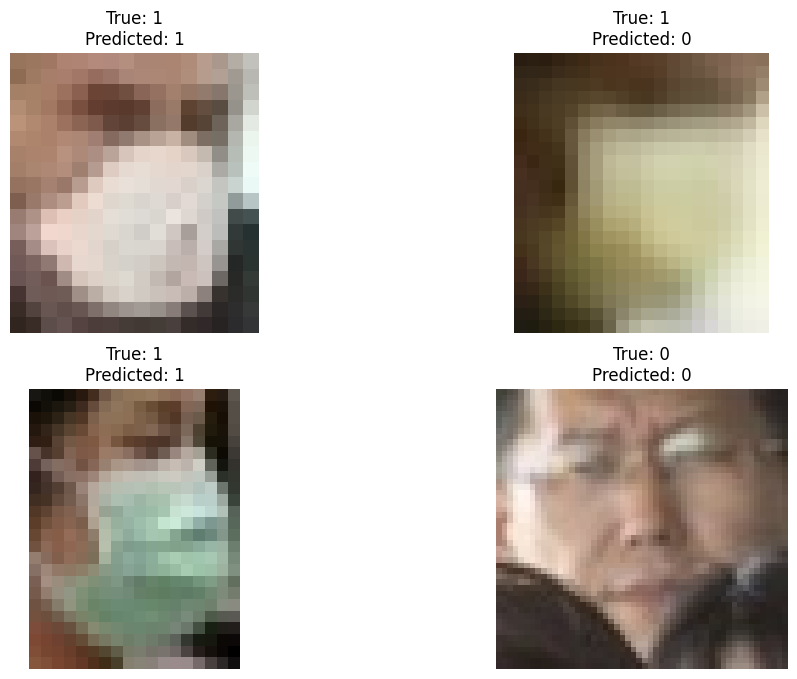

In [ ]:
# Available models

# 1. model_cnn
# 2. mlp_hog
# 3. svm_hog
# 4  mlp_sift


path_to_testset = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset/test')

MaskDetection(path_to_testset, 'model_cnn')

# Test MaskDetectionVideo

This section should allow a quick test of the `MaskDetectionVideo` function. First, add cells with the code needed to load the necessary subroutines to make `MaskDetectionVideo` work.

In [ ]:
#This function was made with the help of the code in lab 8.

rc('animation', html='jshtml')  # Setting up Matplotlib to use javascript for animations

# Function to process each frame of the video
def process_each_frame(frame, model, mtcnn):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # converting the frame from BGR to RGB
    rgb_pil_frame = Image.fromarray(rgb_frame)          # Converting the RGB frame to a PIL object
    rgb_np_frame = np.array(rgb_pil_frame)              # Converting the PIL image to numpy array

    # Use detect_faces method for face detection.
    result = mtcnn.detect_faces(rgb_np_frame)           # Using MTCNN model to detect faces in the frame
    if result:                                          # if there are any faces detected
        for face_data in result:                        # To iterate over every detected face
            box = face_data['box']                      # Extracting the bounding box coordinates of the detected face
            face = rgb_pil_frame.crop((box[0], box[1], box[0] + box[2], box[1] + box[3]))  # cropping the face region from the PIL image using the bounding box coordinates.
            face = face.resize((64, 64))                                                   # Resizing the cropped face region
            face_array = tf.keras.preprocessing.image.img_to_array(face)                   # converting the resized face image to a NumPy array.
            face_array = tf.expand_dims(face_array, 0)                                     # adds an extra dimension to the face array to match the input shape expected by the model
            prediction = model.predict(face_array)                                         # the model makes the prediction of the class of the face
            predicted_class = tf.argmax(prediction, axis=1).numpy()[0]                     # extracting the predicted class label from the prediction using argmax
            labels = ["No Mask", "Mask Worn", "Incorrectly Worn Mask"][predicted_class]                  # the labels which will appear on the video
            cv2.rectangle(rgb_frame, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), (0, 200, 0),2)         # drawing a rectangle around the detected face
            cv2.putText(rgb_frame, labels, (box[0], box[1] - 10), cv2.FONT_HERSHEY_DUPLEX, 1.1, (0, 200, 0),2)     # adding the text labelling near the detected face


    processed_frame = cv2.cvtColor(rgb_frame, cv2.COLOR_RGB2BGR)  # converting the processed RGB frame back to BGR format
    return processed_frame  # returning the processed frame


In [ ]:
#MaskDetectionVideo function was made with the help from the code in Lab 9

# Main function to process the video and save the output - choosing to skip every 30 frames.
def MaskDetectionVideo(video_filename):
    skip_frames = 30. #Number of frames to skip for processing
    video_path = os.path.join('/content/drive/MyDrive/CW_Folder_PG/Video/', video_filename)  #full path to the video file
    model = model_cnn

    # Load the MTCNN model for face detection
    mtcnn = MTCNN()

    # Open video file from drive.
    vidcap = cv2.VideoCapture(video_path)  # opens the video file specified by video_path using OpenCV's VideoCapture function.
    processed_frames = []               # Initializing an empty list to store the processed frames
    frame_count = 0                     # Initializing an empty list to store the frame count

    # Read frames from the video.
    while vidcap.isOpened():               # starts a loop to read each frame from the video until it is opened
        ret, frame = vidcap.read()         # reads a single frame from the video. ret is a boolean indicating whether a frame was successfully read, and frame contains the actual frame data.
        if not ret:                     # breaks the loop if there are no more frames to read
            break

        # Process only every 30th frame.
        if frame_count % skip_frames == 0:  # This line checks if the current frame number is divisible by 30, indicating that it's time to process this frame.
            frame_processed = process_each_frame(frame, model, mtcnn)  # this line calls the process_each_frame function to process the current frame
            processed_frames.append(frame_processed)  # appends the processed frame to the processed_frames list.

        frame_count += 1  # increments the frame_count variable to keep track of the number of frames processed.

    vidcap.release()

    # Save the processed video as mp4.
    output_path = os.path.join('/content/drive/MyDrive/CW_Folder_PG/Video/', 'Generated_video.mp4')  # line constructs the output path for the processed video file by joining the directory of the input video file with the filename 'Generated.mp4'.
    height, width, _ = processed_frames[0].shape  # retrieves the height and width of the first processed frame in the processed_frames list.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # specifies the codec to be used for writing the video (in this case, 'mp4v').
    out = cv2.VideoWriter(output_path, fourcc, 30 / skip_frames, (width, height))  # line creates a VideoWriter object to write the processed frames to a video file.

    for frame in processed_frames:
        out.write(frame)  # loop writes each processed frame to the output video file
    out.release()  # line releases the VideoWriter object, finalizing the writing process and closing the output file.

    # Create an animation from processed_frames for display.
    fig, ax = plt.subplots()  # This line creates a new figure and axis objects for plotting with Matplotlib.

    def animate(i):
        ax.clear()
        ax.axis('off')
        im = ax.imshow(cv2.cvtColor(processed_frames[i], cv2.COLOR_BGR2RGB))
        return [im]  # This block defines an animate function that updates the plot with the i-th frame from processed_frames.

    ani = animation.FuncAnimation(fig, animate, frames=len(processed_frames), interval=int(1000 / (30 / skip_frames)), blit=True)  # creates an animation using Matplotlib's FuncAnimation function.
    plt.close(fig)  # This line closes the figure to prevent it from being displayed immediately.
    return ani



Then, make a call to the `MaskDetectionVideo` function to see what results it produces.

In [ ]:
MaskDetectionVideo('Video.mp4')


Output hidden; open in https://colab.research.google.com to view.